<xarray.Dataset> Size: 498MB
Dimensions:         (valid_time: 12, pressure_level: 5, latitude: 721,
                     longitude: 1440)
Coordinates:
    number          int64 8B 0
  * valid_time      (valid_time) datetime64[ns] 96B 2023-01-01 ... 2023-12-01
  * pressure_level  (pressure_level) float64 40B 300.0 250.0 225.0 200.0 175.0
  * latitude        (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude       (longitude) float64 12kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
    expver          (valid_time) <U4 192B '0001' '0001' '0001' ... '0001' '0001'
Data variables:
    u               (valid_time, pressure_level, latitude, longitude) float32 249MB ...
    v               (valid_time, pressure_level, latitude, longitude) float32 249MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European C

/home/omg28/ConflictTrails/ED_quickest_route.py:609: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  conflict_buffered = conflict_zones.geometry.buffer(1.0)
/home/omg28/ConflictTrails/ED_quickest_route.py:743: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  conflict_buffered = conflict_zones.geometry.buffer(1.0)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 408.5108527680098
            Iterations: 28
            Function evaluations: 439
            Gradient evaluations: 28
19580131.793012433


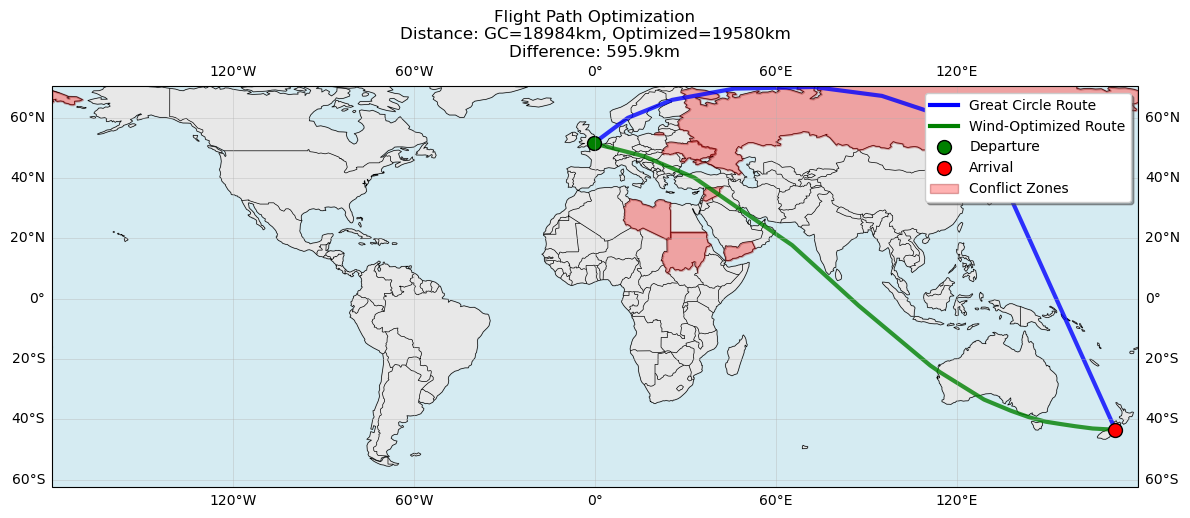

Optimization terminated successfully    (Exit mode 0)
            Current function value: 344.0246469589939
            Iterations: 25
            Function evaluations: 405
            Gradient evaluations: 25
17320375.03696215


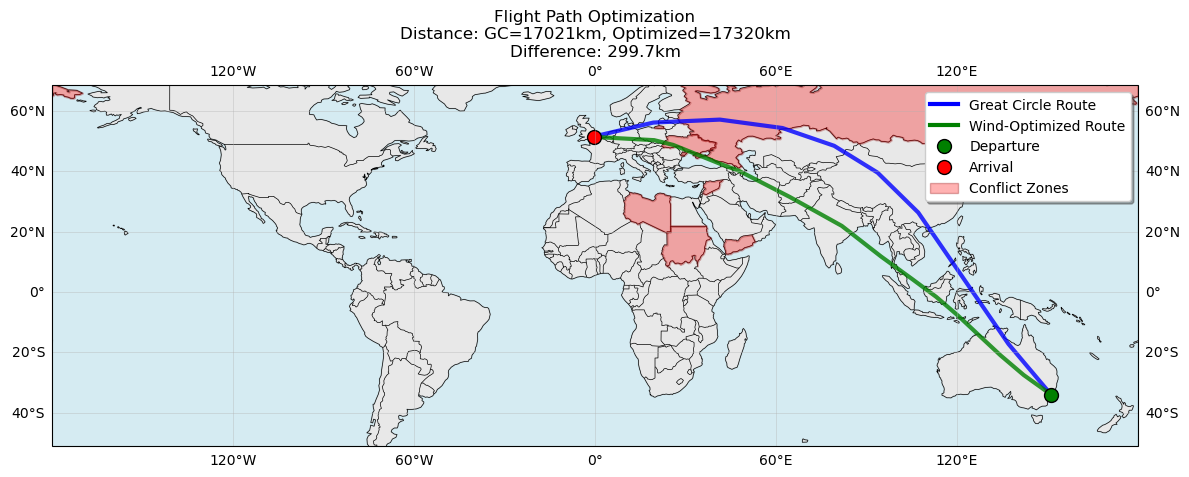

Optimization terminated successfully    (Exit mode 0)
            Current function value: 362.4247436860487
            Iterations: 14
            Function evaluations: 234
            Gradient evaluations: 14
15818227.656437509


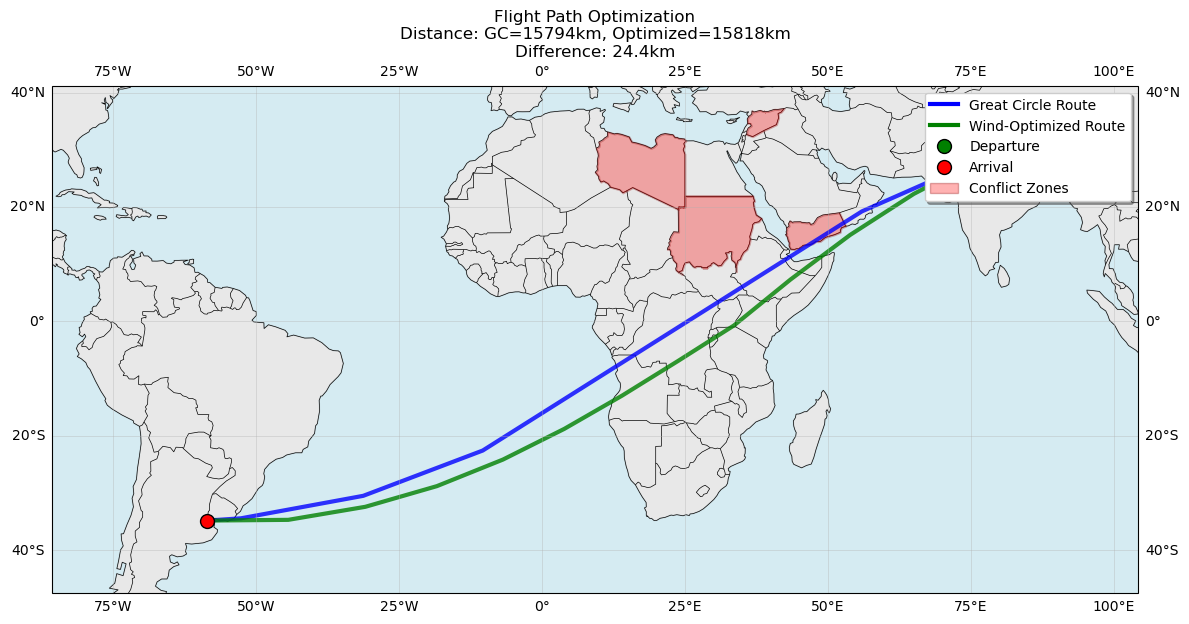

Optimization terminated successfully    (Exit mode 0)
            Current function value: 319.1997242131906
            Iterations: 10
            Function evaluations: 162
            Gradient evaluations: 10
15520224.970732447


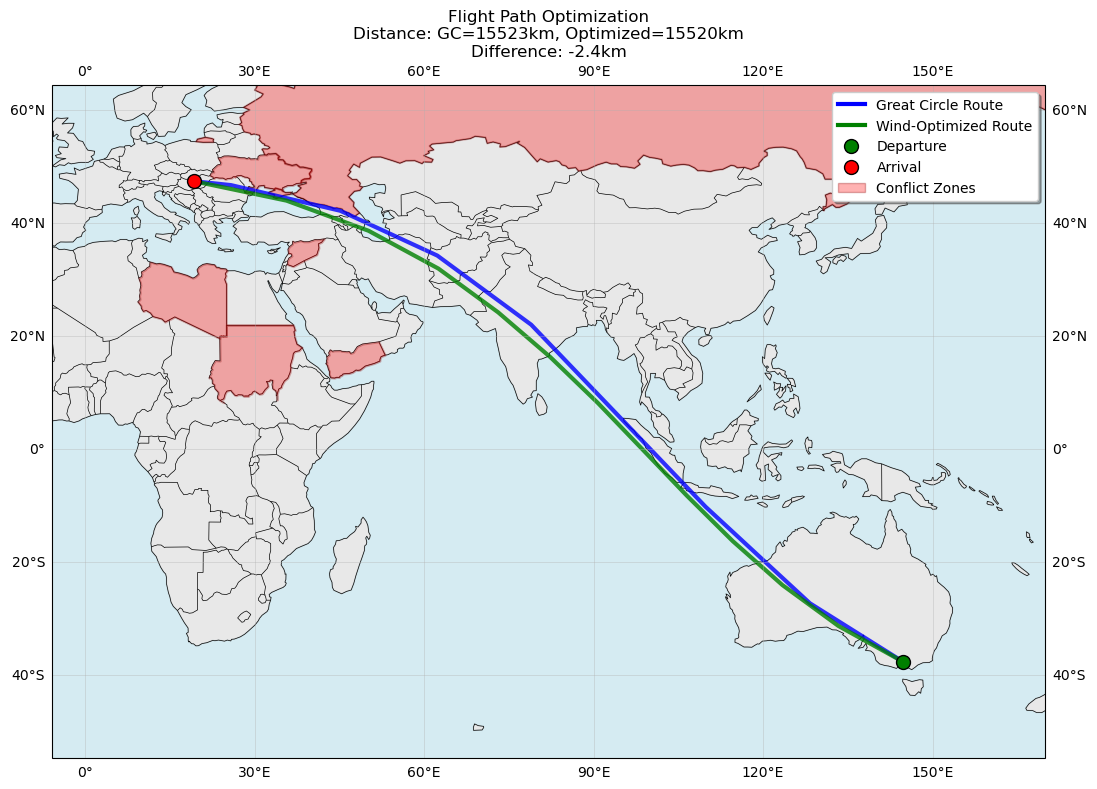

Generated emissions file for month: 2023-01


In [1]:
# testing ED_quickest_route
from ED_quickest_route import process_month_emissions_conflict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from telegram_notifier import send_telegram_notification

# User Inputs:
start_time_str       = '2023-01-01T00:00:00Z'
stop_time_str        = '2023-01-31T23:59:59Z'
query_limit          = 15e4
send_notification    = True
make_plot            = True
output_dir           = "/scratch/omg28/Data/"


# Convert start and stop times to datetime objects
start_time_simple = pd.to_datetime(start_time_str).strftime("%Y-%m-%d")
stop_time_simple = pd.to_datetime(stop_time_str).strftime("%Y-%m-%d")

performance_and_emissions_model = pd.read_pickle('performance_and_emissions_model.pkl')

for start_time_str_loop in pd.date_range(start=pd.to_datetime(start_time_str), end=pd.to_datetime(stop_time_str), freq='MS', tz='UTC'):
    stop_time_str_loop = (start_time_str_loop + pd.offsets.MonthEnd(1)).replace(hour=23, minute=59, second=59)
    process_month_emissions_conflict(
        start_time_str_loop,
        output_dir=output_dir,
        performance_and_emissions_model=performance_and_emissions_model
    )
    print(f"Generated emissions file for month: {start_time_str_loop.strftime('%Y-%m')}")
    telegram_message = f"Emissions file for {start_time_str_loop.strftime('%Y-%m')} generated successfully."
    send_telegram_notification(telegram_message)

In [ ]:
# testing ED_quickest_route
from ED_quickest_route import process_month_emissions_conflict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from telegram_notifier import send_telegram_notification

# User Inputs:
start_time_str       = '2023-01-01T00:00:00Z'
stop_time_str        = '2023-01-31T23:59:59Z'
query_limit          = 15e4
send_notification    = True
make_plot            = True
output_dir           = "/scratch/omg28/Data/"
monthly_flights = pd.read_pickle(f'{output_dir}2023-01-01_to_2023-01-31_labeled.pkl')

In [ ]:
point = (0,1)
dep_loc = point(0,1))